# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid': weather_api_key,
    'units': 'imperial'
}
print("Beginning Data Retrieval")
print("------------------------------------")

city_dicty = {
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
} 
count = 1

for city in cities:
    params['q'] = city
    
    response = requests.get(base_url, params=params).json()
    
    try:
        
        city_dicty['Lat'].append(response['coord']['lat'])
        city_dicty['Lng'].append(response['coord']['lon'])
        city_dicty['Max Temp'].append(response['main']['temp_max'])
        city_dicty['Humidity'].append(response['main']['humidity'])
        city_dicty['Cloudiness'].append(response['clouds']['all'])
        city_dicty['Wind Speed'].append(response['wind']['speed'])
        city_dicty['Country'].append(response['sys']['country'])
        city_dicty['Date'].append(response['dt'])
        city_dicty['City'].append(response['name'])
        print(f'Processing Record {count} of {len(cities)} | {city}')
    except KeyError:
        print('City not found, skipping...')
    count += 1
    
        
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------------------
Processing Record 1 of 630 | grandview
Processing Record 2 of 630 | punta arenas
Processing Record 3 of 630 | ushuaia
Processing Record 4 of 630 | gushikawa
Processing Record 5 of 630 | saint-pierre
Processing Record 6 of 630 | cape town
Processing Record 7 of 630 | junin
Processing Record 8 of 630 | mar del plata
Processing Record 9 of 630 | casablanca
Processing Record 10 of 630 | qaanaaq
City not found, skipping...
City not found, skipping...
City not found, skipping...
Processing Record 14 of 630 | ilhabela
Processing Record 15 of 630 | kodiak
Processing Record 16 of 630 | iqaluit
Processing Record 17 of 630 | cockburn town
Processing Record 18 of 630 | east london
Processing Record 19 of 630 | fortuna
Processing Record 20 of 630 | balikpapan
Processing Record 21 of 630 | bambous virieux
Processing Record 22 of 630 | mataura
Processing Record 23 of 630 | nikolskoye
Processing Record 24 of 630 | rikitea
Processing Record 

Processing Record 212 of 630 | kirakira
Processing Record 213 of 630 | bandiagara
Processing Record 214 of 630 | upata
Processing Record 215 of 630 | heihe
Processing Record 216 of 630 | marawi
Processing Record 217 of 630 | klaksvik
Processing Record 218 of 630 | bahawalnagar
Processing Record 219 of 630 | buala
Processing Record 220 of 630 | msanga
Processing Record 221 of 630 | nantucket
City not found, skipping...
Processing Record 223 of 630 | caloundra
Processing Record 224 of 630 | novoagansk
Processing Record 225 of 630 | guaruja
Processing Record 226 of 630 | waitati
Processing Record 227 of 630 | tecoanapa
Processing Record 228 of 630 | chapais
Processing Record 229 of 630 | saskylakh
Processing Record 230 of 630 | bodh gaya
Processing Record 231 of 630 | georgetown
City not found, skipping...
Processing Record 233 of 630 | ambilobe
Processing Record 234 of 630 | bolobo
Processing Record 235 of 630 | hasaki
Processing Record 236 of 630 | xifeng
Processing Record 237 of 630 | 

Processing Record 420 of 630 | mount isa
Processing Record 421 of 630 | xinzhi
Processing Record 422 of 630 | folldal
Processing Record 423 of 630 | ambunti
Processing Record 424 of 630 | oriximina
Processing Record 425 of 630 | masallatah
Processing Record 426 of 630 | fare
Processing Record 427 of 630 | barra
Processing Record 428 of 630 | daitari
Processing Record 429 of 630 | necochea
Processing Record 430 of 630 | rong kwang
City not found, skipping...
Processing Record 432 of 630 | itoman
Processing Record 433 of 630 | benjamin aceval
Processing Record 434 of 630 | labytnangi
Processing Record 435 of 630 | marzuq
Processing Record 436 of 630 | scarborough
City not found, skipping...
Processing Record 438 of 630 | gobabis
Processing Record 439 of 630 | hambantota
Processing Record 440 of 630 | salta
Processing Record 441 of 630 | bilibino
Processing Record 442 of 630 | mezica
Processing Record 443 of 630 | narasannapeta
Processing Record 444 of 630 | saint-augustin
Processing Reco

Processing Record 629 of 630 | huarmey
Processing Record 630 of 630 | brookhaven
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_dicty)

city_df.to_csv(output_data_file, index = False)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grandview,38.89,-94.53,34.00,86,90,0.09,US,1603849845
1,Punta Arenas,-53.15,-70.92,42.80,75,0,26.40,CL,1603849756
2,Ushuaia,-54.80,-68.30,46.40,36,75,12.75,AR,1603849761
3,Gushikawa,26.35,127.87,82.40,54,20,13.87,JP,1603849847
4,Saint-Pierre,-21.34,55.48,69.80,64,0,4.70,RE,1603849794
...,...,...,...,...,...,...,...,...,...
571,Dordrecht,51.81,4.67,51.01,89,63,5.01,NL,1603850125
572,Pedernales,18.04,-71.74,80.67,71,3,0.56,DO,1603850125
573,San Roque,36.21,-5.38,60.80,67,0,13.87,ES,1603850126
574,Huarmey,-10.07,-78.15,63.79,86,92,6.44,PE,1603850126


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.052118,18.472396,58.508611,73.637153,51.583333,7.166267,1.603850e+09
std,32.320776,89.069795,22.212471,20.040445,41.069146,5.247074,1.177458e+02
min,-54.800000,-175.200000,-11.900000,1.000000,0.000000,0.040000,1.603849e+09
25%,-6.705000,-59.685000,44.600000,65.000000,1.000000,3.285000,1.603850e+09
50%,24.680000,20.330000,63.120000,79.000000,58.000000,5.820000,1.603850e+09
75%,46.445000,96.640000,77.000000,88.000000,92.250000,10.290000,1.603850e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,48.940000,1.603850e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidaf = city_df.loc[city_df['Humidity'] > 100,:]
humidaf
# isn't that called rain?

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

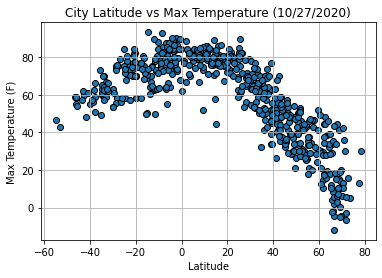

In [8]:
lat = city_df['Lat']
maxtemp = city_df['Max Temp']

plt.scatter(lat, maxtemp, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (10/27/2020)')
plt.grid()
plt.savefig('Images/fig1.png')

## Latitude vs. Humidity Plot

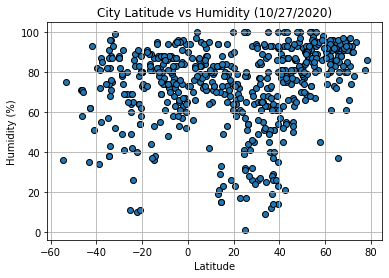

In [10]:
humid = city_df['Humidity']

plt.scatter(lat, humid, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (10/27/2020)')
plt.grid()
plt.savefig('Images/fig2.png')

## Latitude vs. Cloudiness Plot

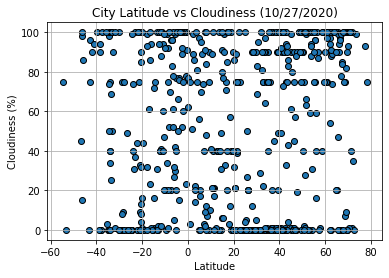

In [9]:
cloud = city_df['Cloudiness']

plt.scatter(lat, cloud, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (10/27/2020)')
plt.grid()
plt.savefig('Images/fig3.png')

## Latitude vs. Wind Speed Plot

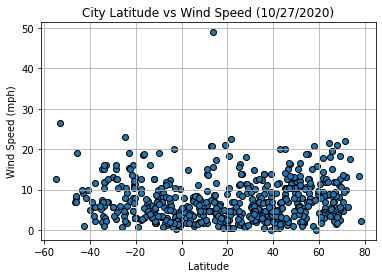

In [11]:
windy = city_df['Wind Speed']

plt.scatter(lat, windy, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (10/27/2020)')
plt.grid()
plt.savefig('Images/fig4.png')

## Linear Regression

In [13]:
north = city_df.loc[city_df['Lat'] >= 0,:]
south = city_df.loc[city_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8859635113776124


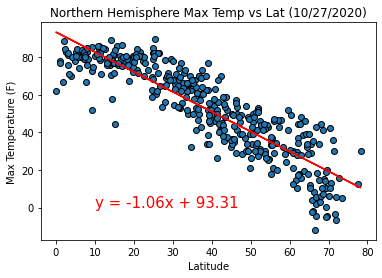

In [14]:
northlat = north['Lat']
northmax = north['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northmax)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northmax, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(10,0), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temp vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6679954192119874


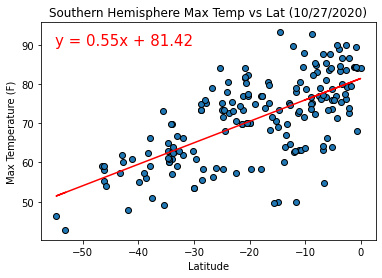

In [17]:
southlat = south['Lat']
southmax = south['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southmax)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southmax, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55, 90), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Max Temp vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29778595266584745


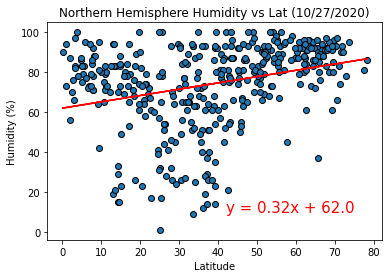

In [18]:
northhum = north['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northhum)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northhum, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(42,10), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.16879399864998917


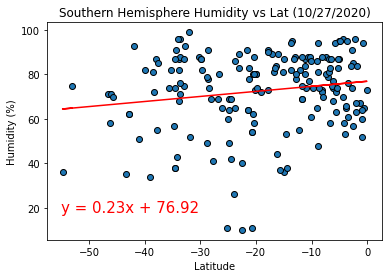

In [19]:
southhum = south['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southhum)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southhum, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55,18), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.23148645894699107


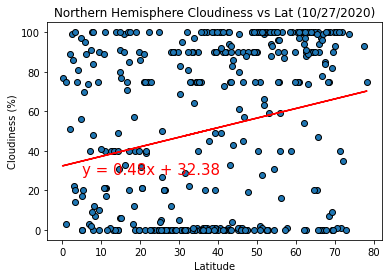

In [20]:
northcloud = north['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northcloud)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northcloud, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(5,28), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.16224028575288443


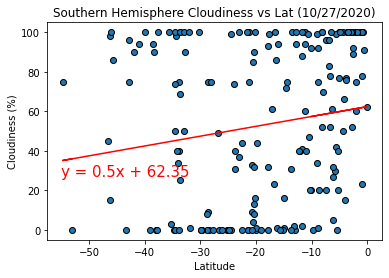

In [21]:
southcloud = south['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southcloud)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southcloud, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55,27), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.17018017011544487


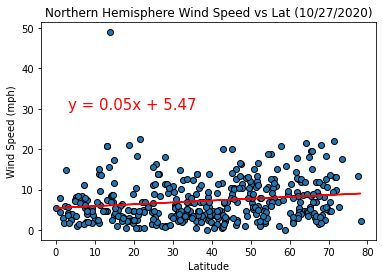

In [22]:
northwind = north['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northwind)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northwind, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(3,30), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2958210896498208


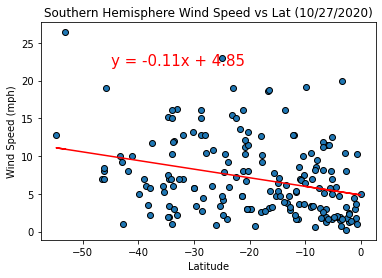

In [23]:
southwind = south['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southwind)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southwind, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-45,22), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')
plt.savefig('Images/fig12.png')